In [1]:
# Library import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [2]:
# Dataframe import
df = pd.read_csv('./frauddetection.csv')

## First look + retyping

In [3]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [10]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
# Convert to float
df[['amount', 'oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']] = df[['amount', 'oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']].astype(float)

#Convert to int
df[['step', 'isFraud','isFlaggedFraud']] = df[['step', 'isFraud','isFlaggedFraud']].astype(int)

In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
# The dataframe seems to have no missing values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
df.type.value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

## EDA and Feature Engineering

In [9]:
# New column is created to see the recipient of funds - C- Customer account, M - Merchant account
df['nameDest_first'] = df['nameDest'].map(lambda x: x[0])

In [10]:
# New column is created to see the sender of funds -- alternative method of column creation is used for training purposes
df['nameOrig_first'] = df['nameOrig'].str[0]

In [ ]:
# Quick visualisation of distribution of values in the new feature 
sns.countplot(data=df, x='nameDest_first', hue='isFraud')

Insight: All of the fraudulent transactions are included in the transactions starting with "C" - Likely Customer accounts vs. merchant accounts
Notice how massively imbalanced the dataset is. The fraudulent transactions column is barely visible

In [12]:
# Finding the categories for C and M
c_recipients = df.loc[df['nameDest_first'] == 'C']
m_recipients = df.loc[df['nameDest_first'] == 'M']

In [13]:
c_recipients['type'].value_counts()

type
CASH_OUT    2237500
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [14]:
# All of M is payment
m_recipients['type'].value_counts()

type
PAYMENT    2151495
Name: count, dtype: int64

Insight: "M" transactions only contain payments. This leads us to believe that M indeed stands for "Merchant"

In [15]:
# Just a small portion of the dataset (0,13% are DETECTED frauds)
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [16]:
# Is Flagged only has 16 values and is thus insignificant. Will be dropped.
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [17]:
# All of isFlaggedFraud are also frauds
df.query("isFlaggedFraud == 1")

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameDest_first,nameOrig_first
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1,C,C
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1,C,C
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1,C,C
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1,C,C
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1,C,C
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1,C,C
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1,C,C
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1,C,C
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1,C,C
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1,C,C


In [18]:
# Half of the frauds are with the original account being emptied of funds
df.query('newbalanceDest >0 and isFraud ==1 and newbalanceOrig ==0')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameDest_first,nameOrig_first
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.00,12145.85,1,0,C,C
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.00,9291619.62,1,0,C,C
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.00,2444985.19,1,0,C,C
1116,1,CASH_OUT,35063.63,C1635772897,35063.63,0.0,C1983025922,31140.00,7550.03,1,0,C,C
1870,1,CASH_OUT,25071.46,C1275464847,25071.46,0.0,C1364913072,9083.76,34155.22,1,0,C,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0,C,C
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0,C,C
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,C,C
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,C,C


In [19]:
# While half of the frauds are emptied out accounts, on the grand scheme of things, the emptied out accounts are very common and NOT fraud
df.query('newbalanceOrig==0 and isFraud ==0')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameDest_first,nameOrig_first
8,1,PAYMENT,4024.36,C1265012928,2671.0,0.0,M1176932104,0.00,0.00,0,0,M,C
10,1,DEBIT,9644.94,C1900366749,4465.0,0.0,C997608398,10845.00,157982.12,0,0,C,C
13,1,PAYMENT,11633.76,C1716932897,10127.0,0.0,M801569151,0.00,0.00,0,0,M,C
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.00,51513.44,0,0,C,C
16,1,PAYMENT,1563.82,C761750706,450.0,0.0,M1731217984,0.00,0.00,0,0,M,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362316,718,PAYMENT,1022.91,C1203084509,12.0,0.0,M675916850,0.00,0.00,0,0,M,C
6362317,718,CASH_OUT,317177.48,C857156502,170.0,0.0,C784108220,345042.13,662219.61,0,0,C,C
6362320,718,CASH_OUT,159188.22,C691808084,3859.0,0.0,C1818183087,0.00,159188.22,0,0,C,C
6362321,718,CASH_OUT,186273.84,C102120699,168046.0,0.0,C1515639522,24893.67,211167.51,0,0,C,C


In [20]:
emptied = df.loc[(df['newbalanceOrig'] == 0) & (df['isFraud'] == 1)]
not_emptied = df.loc[(df['newbalanceOrig'] > 0) & (df['isFraud'] == 1)]

In [21]:
print(len(emptied))
print(len(not_emptied))

8053
160


In [22]:
not_emptied.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameDest_first,nameOrig_first
4440,4,TRANSFER,10000000.00,C7162498,12930418.44,2930418.44,C945327594,0.00,0.00,1,0,C,C
60853,9,TRANSFER,994453.20,C1121789613,1437370.87,442917.67,C254839817,194812.76,665743.67,1,0,C,C
377151,17,CASH_OUT,42062.82,C897869440,340830.43,298767.61,C616721459,398931.35,678419.64,1,0,C,C
481250,19,TRANSFER,10000000.00,C416779475,11861008.32,1861008.32,C380259496,0.00,0.00,1,0,C,C
586311,33,TRANSFER,10000000.00,C1439740840,19887819.06,9887819.06,C875288652,0.00,0.00,1,0,C,C


In [23]:
# A pattern was discovered, where the fraudulent operations often had both oldbalanceDest and newbalanceDest 0 and the amounts tranferred on the old account were over 10 million
suspect_operations = df.query('oldbalanceDest ==0 and newbalanceDest ==0 and isFraud ==1 and amount >=1000000')

In [24]:
suspect_operations

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameDest_first,nameOrig_first
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.00,C431687661,0.0,0.0,1,0,C,C
3059,2,TRANSFER,1096187.24,C1093223281,1096187.24,0.00,C2063275841,0.0,0.0,1,0,C,C
4440,4,TRANSFER,10000000.00,C7162498,12930418.44,2930418.44,C945327594,0.0,0.0,1,0,C,C
4442,4,TRANSFER,2930418.44,C2047521920,2930418.44,0.00,C449261773,0.0,0.0,1,0,C,C
10395,7,TRANSFER,5460002.91,C666654362,5460002.91,0.00,C1726301214,0.0,0.0,1,0,C,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362584,741,TRANSFER,5674547.89,C992223106,5674547.89,5674547.89,C1366804249,0.0,0.0,1,1,C,C
6362598,742,TRANSFER,4009058.39,C1044665079,4009058.39,0.00,C750074708,0.0,0.0,1,0,C,C
6362602,742,TRANSFER,1819543.69,C2089752665,1819543.69,0.00,C112833674,0.0,0.0,1,0,C,C
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.00,C1470998563,0.0,0.0,1,0,C,C


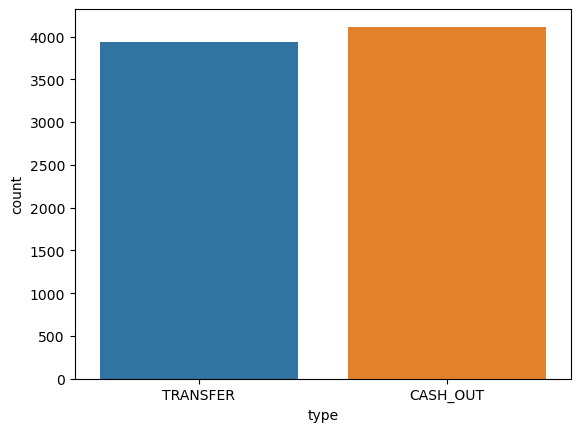

In [15]:
# Countplot displaying types of fraudulent transfers that ended up with 0 balance
sns.countplot(data=emptied, x='type')
plt.show()

In [25]:
# Ratio of fraudulent cash outs vs. normal cash outs (0,18%)
fraudulent_cash_outs = df.query('type == "CASH_OUT" and isFraud == 1')
all_cash_outs = df.query('type == "CASH_OUT"')
fraudulent_cash_out_ratio = len(fraudulent_cash_outs) / len(all_cash_outs )
print(fraudulent_cash_out_ratio*100)

0.18395530726256984


In [26]:
# Create a new column, which checks if both new balances are 0
df['isZero'] = ((df['oldbalanceDest'] == 0) & (df['newbalanceDest'] == 0)).astype(int)

In [27]:
# Creating a new final dataframe for machine learning
df = df[[#'step', 
         'type', 'amount', 
         #'nameOrig', 
         'oldbalanceOrg', 'newbalanceOrig',
       #'nameDest', 
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'nameDest_first',
       #'isFlaggedFraud', 
       'nameOrig_first', 'isZero']].copy()

In [28]:
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,nameDest_first,nameOrig_first,isZero
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,M,C,1
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,M,C,1
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,C,C,1
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,C,C,0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,M,C,1


## Data preprocessing

In [29]:
# create a new dataframe with only the fraudulent and non-fraudulent transactions
df_fraud = df[df['isFraud'] == 1]
df_not_fraud = df[df['isFraud'] == 0]

In [30]:
print(len(df_not_fraud))
print(len(df_fraud))

6354407
8213


In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [23]:
# split data into train, test and validation sets
X = df.drop(['isFraud'], axis=1)
y = df['isFraud']

# encode categorical data
le = LabelEncoder()
columns_to_encode = ['type', 'nameDest_first', 'nameOrig_first']
X[columns_to_encode] = X[columns_to_encode].apply(lambda col: le.fit_transform(col))

# oversampling the fraudulent transactions
over = SMOTE(sampling_strategy=0.5)
X, y = over.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(5718966, 9) (5718966,)
(1906322, 9) (1906322,)
(1906322, 9) (1906322,)


## XGBCClasifier

In [44]:
#based on the output of LazyClassifier, we can see that the best performing model is XGBClassifier
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [50]:
xgb_clf.save_model('./xgb_clf.json')

In [45]:
# On test data
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, log_loss, roc_auc_score, confusion_matrix

y_pred = xgb_clf.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))
print('Log Loss: ', log_loss(y_test, y_pred))
print('ROC AUC: ', roc_auc_score(y_test, y_pred))

Accuracy:  0.9985191379001029
MSE:  0.0014808620998970792
Precision:  0.9968193524245559
Recall:  0.9987397823919245
F1:  0.9977786433436021
Log Loss:  0.05337568024577072
ROC AUC:  0.9985743809722992


In [46]:
# On validation data
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, log_loss, roc_auc_score, confusion_matrix

y_predval = xgb_clf.predict(X_val)
print('Accuracy: ', accuracy_score(y_val, y_predval))
print('MSE: ', mean_squared_error(y_val, y_predval))
print('Precision: ', precision_score(y_val, y_predval))
print('Recall: ', recall_score(y_val, y_predval))
print('F1: ', f1_score(y_val, y_predval))
print('Log Loss: ', log_loss(y_val, y_predval))
print('ROC AUC: ', roc_auc_score(y_val, y_predval))

Accuracy:  0.9985815617718308
MSE:  0.001418438228169218
Precision:  0.9969924953803221
Recall:  0.9987564616769823
F1:  0.9978736989774254
Log Loss:  0.05112569585000495
ROC AUC:  0.9986253029165879


[[1269124    1914]
 [    790  634494]]


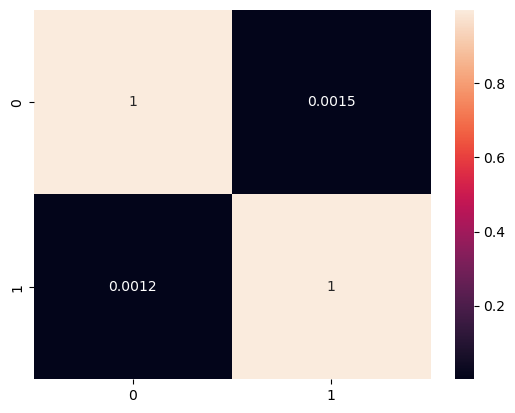

In [47]:
# Confusion Matrix on validation data
sns.heatmap(confusion_matrix(y_val, y_predval, normalize='true'), annot=True)
print(confusion_matrix(y_val, y_predval))

## IsolationForest

In [46]:
from sklearn.ensemble import IsolationForest

if_clf = IsolationForest(
    n_estimators = 350,
    max_samples = "auto",
    contamination = "auto",
    max_features = 0.1,
    bootstrap = True,
    n_jobs = None,
    random_state = 42,
    verbose = 0,
    warm_start = False,
    )
if_clf.fit(X_train, y_train)

IsolationForest(bootstrap=True, max_features=0.1, n_estimators=350,
                random_state=42)

In [24]:
# let's try to improve the model by tuning the hyperparameters
# import optuna
import optuna
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, log_loss, roc_auc_score, confusion_matrix

# define objective function with hyperparameters for XGBoost

def objective(trial, X_train, y_train, X_test, y_test):
    X = X_train
    y = y_train

    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "max_samples": trial.suggest_int("max_samples", 100, 1000),
        "contamination": trial.suggest_float("contamination", 0.01, 0.1),
        "random_state": 42,
    }

    if_clf = IsolationForest(**params)
    if_clf.fit(X, y)
    y_prediction = if_clf.predict(X_test)
    score = f1_score(y_test, y_prediction)
    return score

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(lambda trial: objective(trial, X_train, y_train, X_test, y_test), n_trials=50, show_progress_bar=True)

In [ ]:
# save best params to text file
with open('./best_params.txt', 'w') as f:
    f.write(str(study.best_params))

In [47]:
# On test data
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, log_loss, roc_auc_score, confusion_matrix

y_pred = if_clf.predict(X_test)
#remap -1 to 0
y_pred = np.where(y_pred == -1, 0, y_pred)

print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

Recall:  0.9034972613896105
F1:  0.49733103491332364


In [48]:
# On validation data
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, log_loss, roc_auc_score, confusion_matrix

y_predval = if_clf.predict(X_val)
y_predval = np.where(y_pred == -1, 0, y_pred)
print('Recall: ', recall_score(y_val, y_predval))
print('F1: ', f1_score(y_val, y_predval))

Recall:  0.8770833202158405
F1:  0.4830521221421033


[[ 156534 1114504]
 [  78087  557197]]


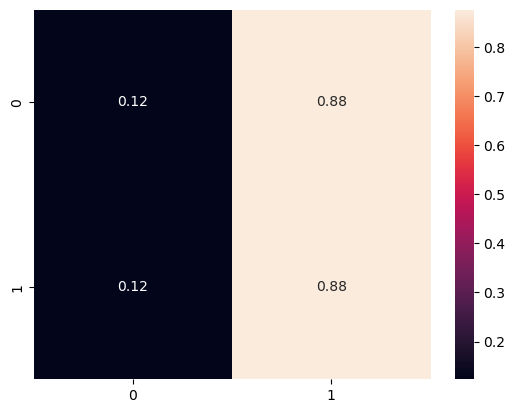

In [49]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_val, y_predval, normalize='true'), annot=True)
print(confusion_matrix(y_val, y_predval))

Isolation Forest does not perform well on this dataset, may need additional tuning. XGBoost performed so good this is not necessary.